# There are some serious issues with this code. 
# It is work in progress.

In [56]:
%pylab inline
# Import the OpenCV bindings
import cv2
# To Increase the image size
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 511.5, 511.5, -0.5)

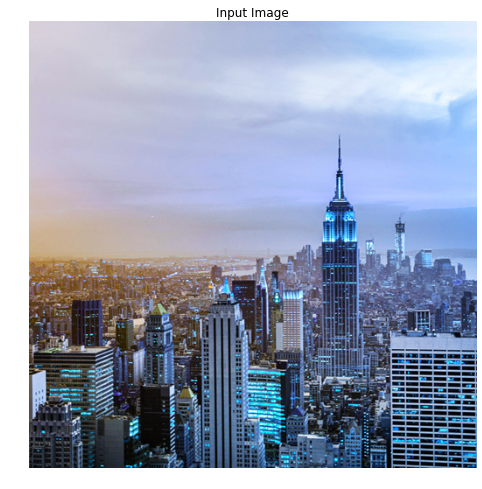

In [57]:
# Load the Image
im = cv2.imread('../data/features/newyork.jpg')
# Convert the image to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imshow(im)
title('Input Image')
axis('off')

In [58]:
gauss_ims = []
lap_ims = []
# Number of octaves
no_octaves = 3
# Number of scales per octace
no_scales = 4

# Construct the Gaussian and Laplacian Pyramid
for i in range(no_octaves):
    gauss_ims.append([])
    lap_ims.append([])
    im = cv2.resize(im_gray, (0,0), fx=1./2**i, fy=1./2**i)
    for j in range(no_scales):
        im = cv2.pyrDown(im) 
        gauss_ims[-1].append(im)
    for j in range(len(gauss_ims[-1])-1):
        print gauss_ims[-1][j].shape, gauss_ims[-1][j+1].shape
        lap_ims[-1].append(cv2.subtract(gauss_ims[-1][j], cv2.pyrUp(gauss_ims[-1][j+1])))

(256, 256) (128, 128)
(128, 128) (64, 64)
(64, 64) (32, 32)
(128, 128) (64, 64)
(64, 64) (32, 32)
(32, 32) (16, 16)
(64, 64) (32, 32)
(32, 32) (16, 16)
(16, 16) (8, 8)


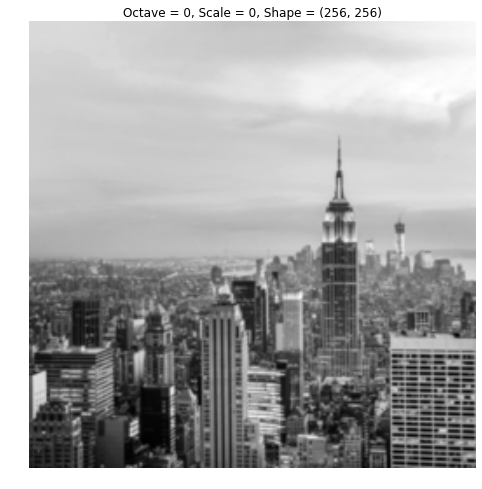

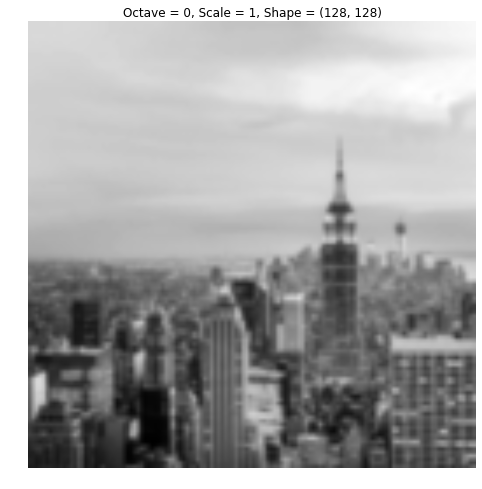

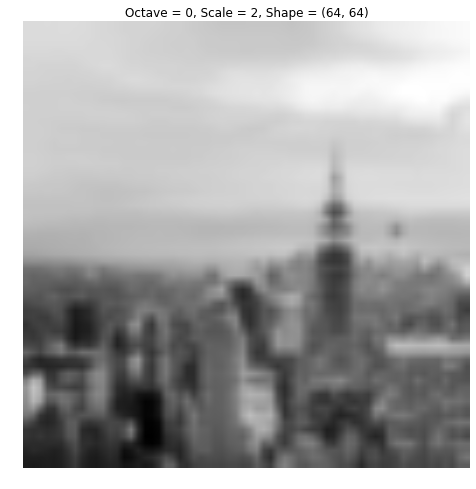

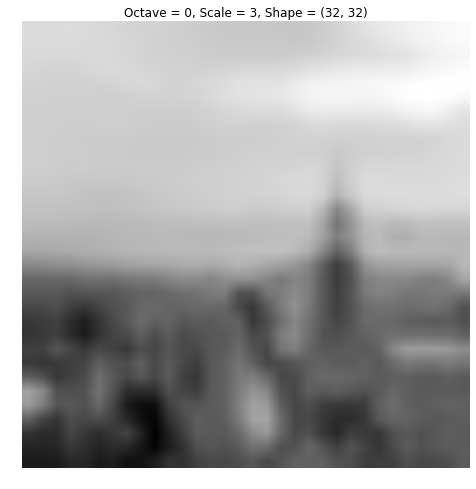

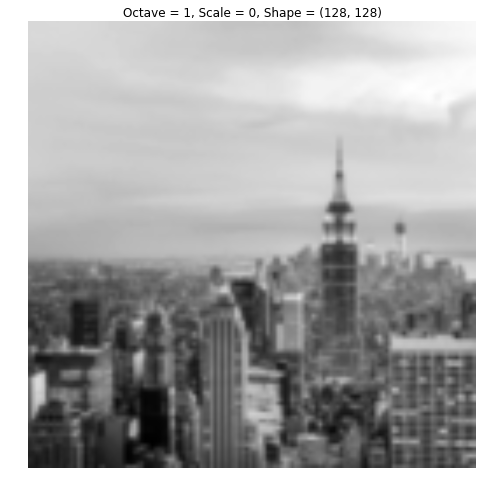

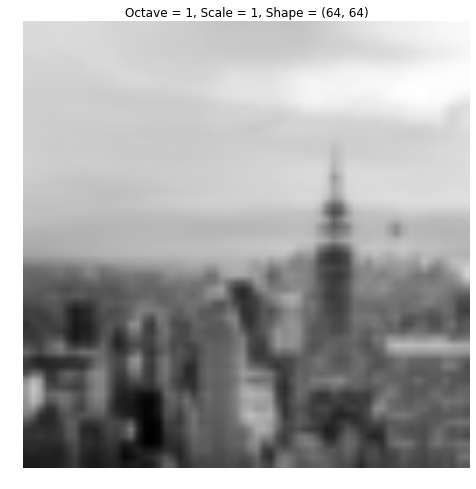

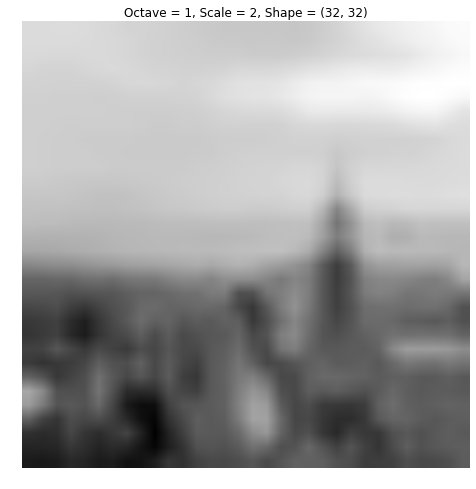

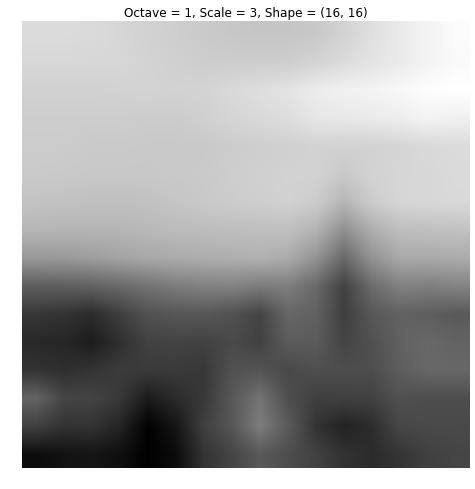

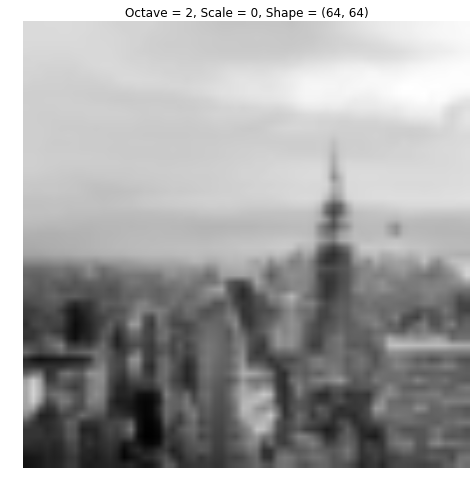

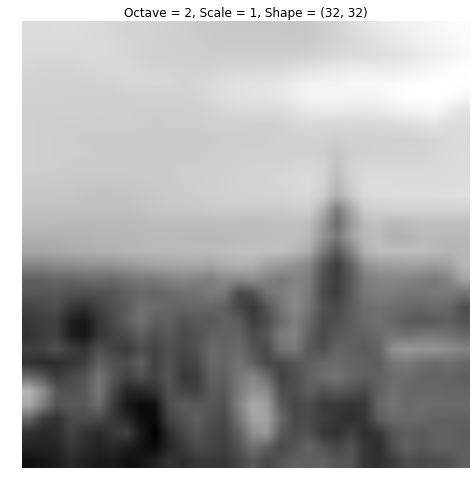

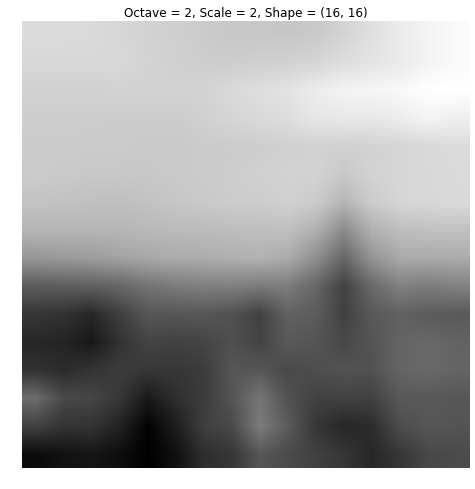

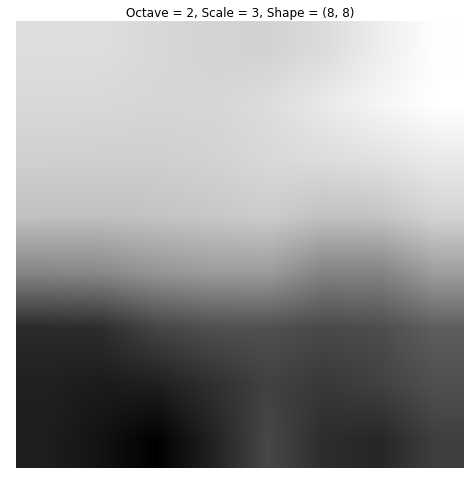

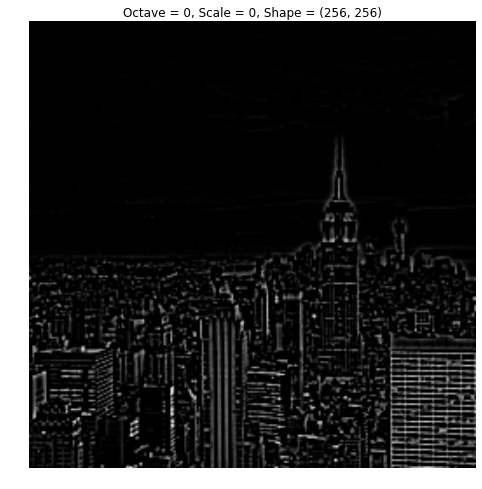

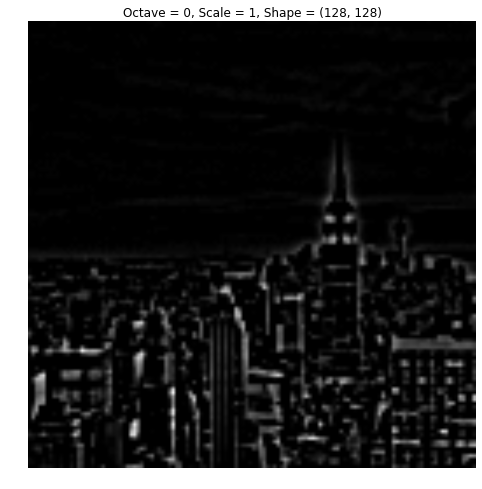

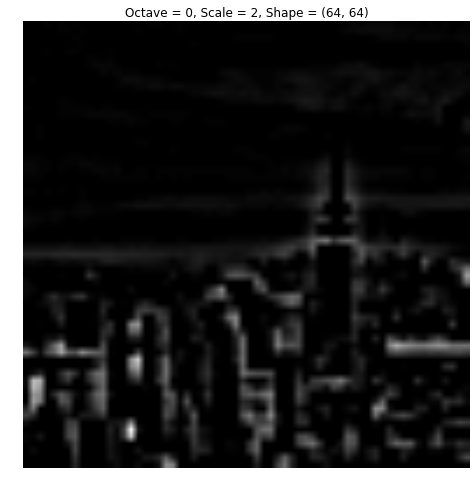

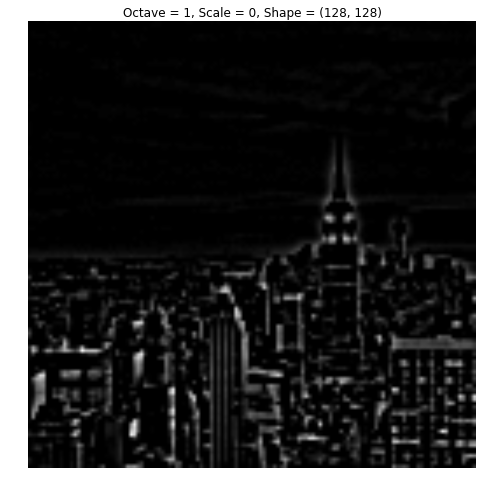

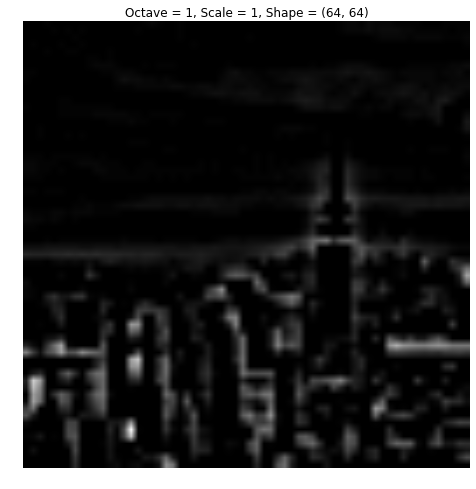

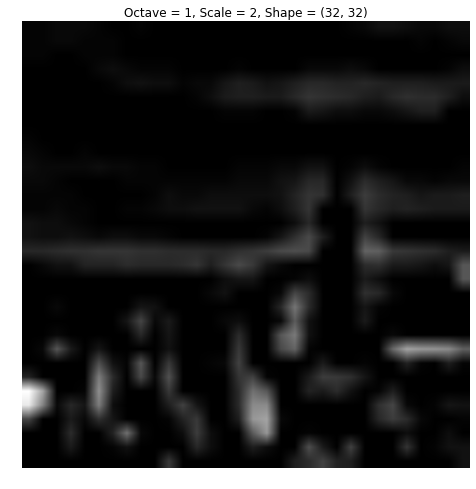

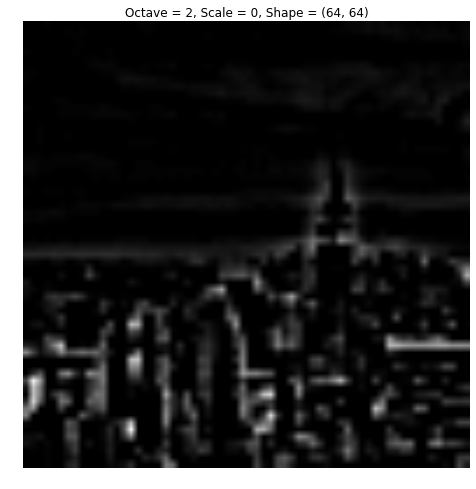

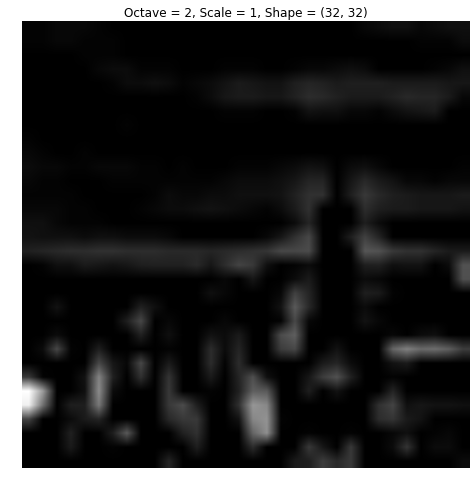

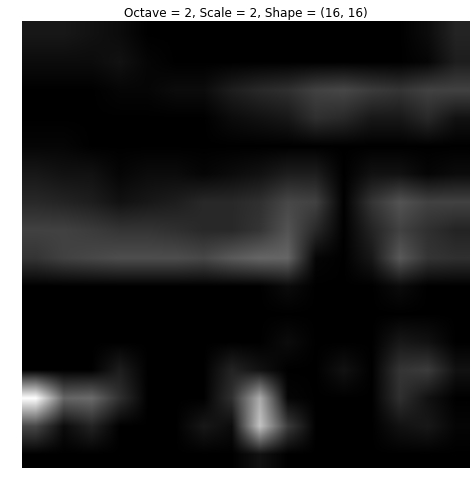

In [59]:
# Display the Gaussian Pyramid
for i in range(len(gauss_ims)):
    for j in range(len(gauss_ims[i])):
        figure()
        imshow(gauss_ims[i][j], cmap=gray())
        title('Octave = {}, Scale = {}, Shape = {}'.format(i, j, gauss_ims[i][j].shape))
        axis('off')

# Display the Laplacian Pyramid
for i in range(len(lap_ims)):
    for j in range(len(lap_ims[i])):
        figure()
        imshow(lap_ims[i][j], cmap=gray())
        title('Octave = {}, Scale = {}, Shape = {}'.format(i, j, lap_ims[i][j].shape))
        axis('off')

In [60]:
keypoints = []
# Finding out max-min
figure()
for i in range(len(lap_ims)):
    for j in range(len(lap_ims[i])-2):
        # Get the current and adjacent Scales
        im_up = cv2.pyrUp(lap_ims[i][j+2])
        im_center = lap_ims[i][j+1]
        im_down = cv2.pyrDown(lap_ims[i][j])
        print i, j, lap_ims[i][j+2].shape, lap_ims[i][j+1].shape, lap_ims[i][j].shape
        print i, j, im_up.shape, im_center.shape, im_down.shape
        for k in range(1, im_center.shape[1]-1):
             for l in range(im_center.shape[0]-1):
                 if np.all(im_up[k-1:k+2, l-1:l+2] > im_center[k, l]) and np.all(im_down[k-1:k+2, l-1:l+2] > im_center[k, l]) and np.all(im_center[k-1:k+2, l-1:l+2] >= im_center[k, l]):
                     keypoints.append(((k, l), i, j+1))     

0 0 (64, 64) (128, 128) (256, 256)
0 0 (128, 128) (128, 128) (128, 128)
1 0 (32, 32) (64, 64) (128, 128)
1 0 (64, 64) (64, 64) (64, 64)
2 0 (16, 16) (32, 32) (64, 64)
2 0 (32, 32) (32, 32) (32, 32)


(-0.5, 511.5, 511.5, -0.5)

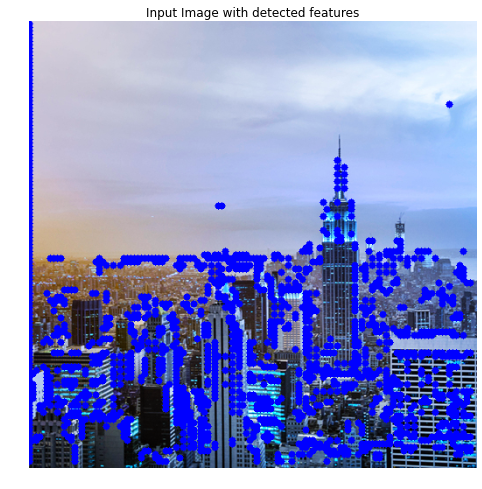

In [61]:
# Load the Image
im = cv2.imread('../data/features/newyork.jpg')
# Draw the image with the detected corners
for keypoint in keypoints:
    cv2.circle(im, tuple(i*2**(keypoint[2]+1)*2**(keypoint[1]) for i in keypoint[0][::-1]), 4, (0, 0, 255), -1)
imshow(im)
title('Input Image with detected features')
axis('off')